In [2]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 8
plt.rcParams['legend.fontsize'] = 7
plt.rcParams['legend.loc'] = 'lower right'
plt.rcParams['figure.facecolor'] = '#FFFFFF'

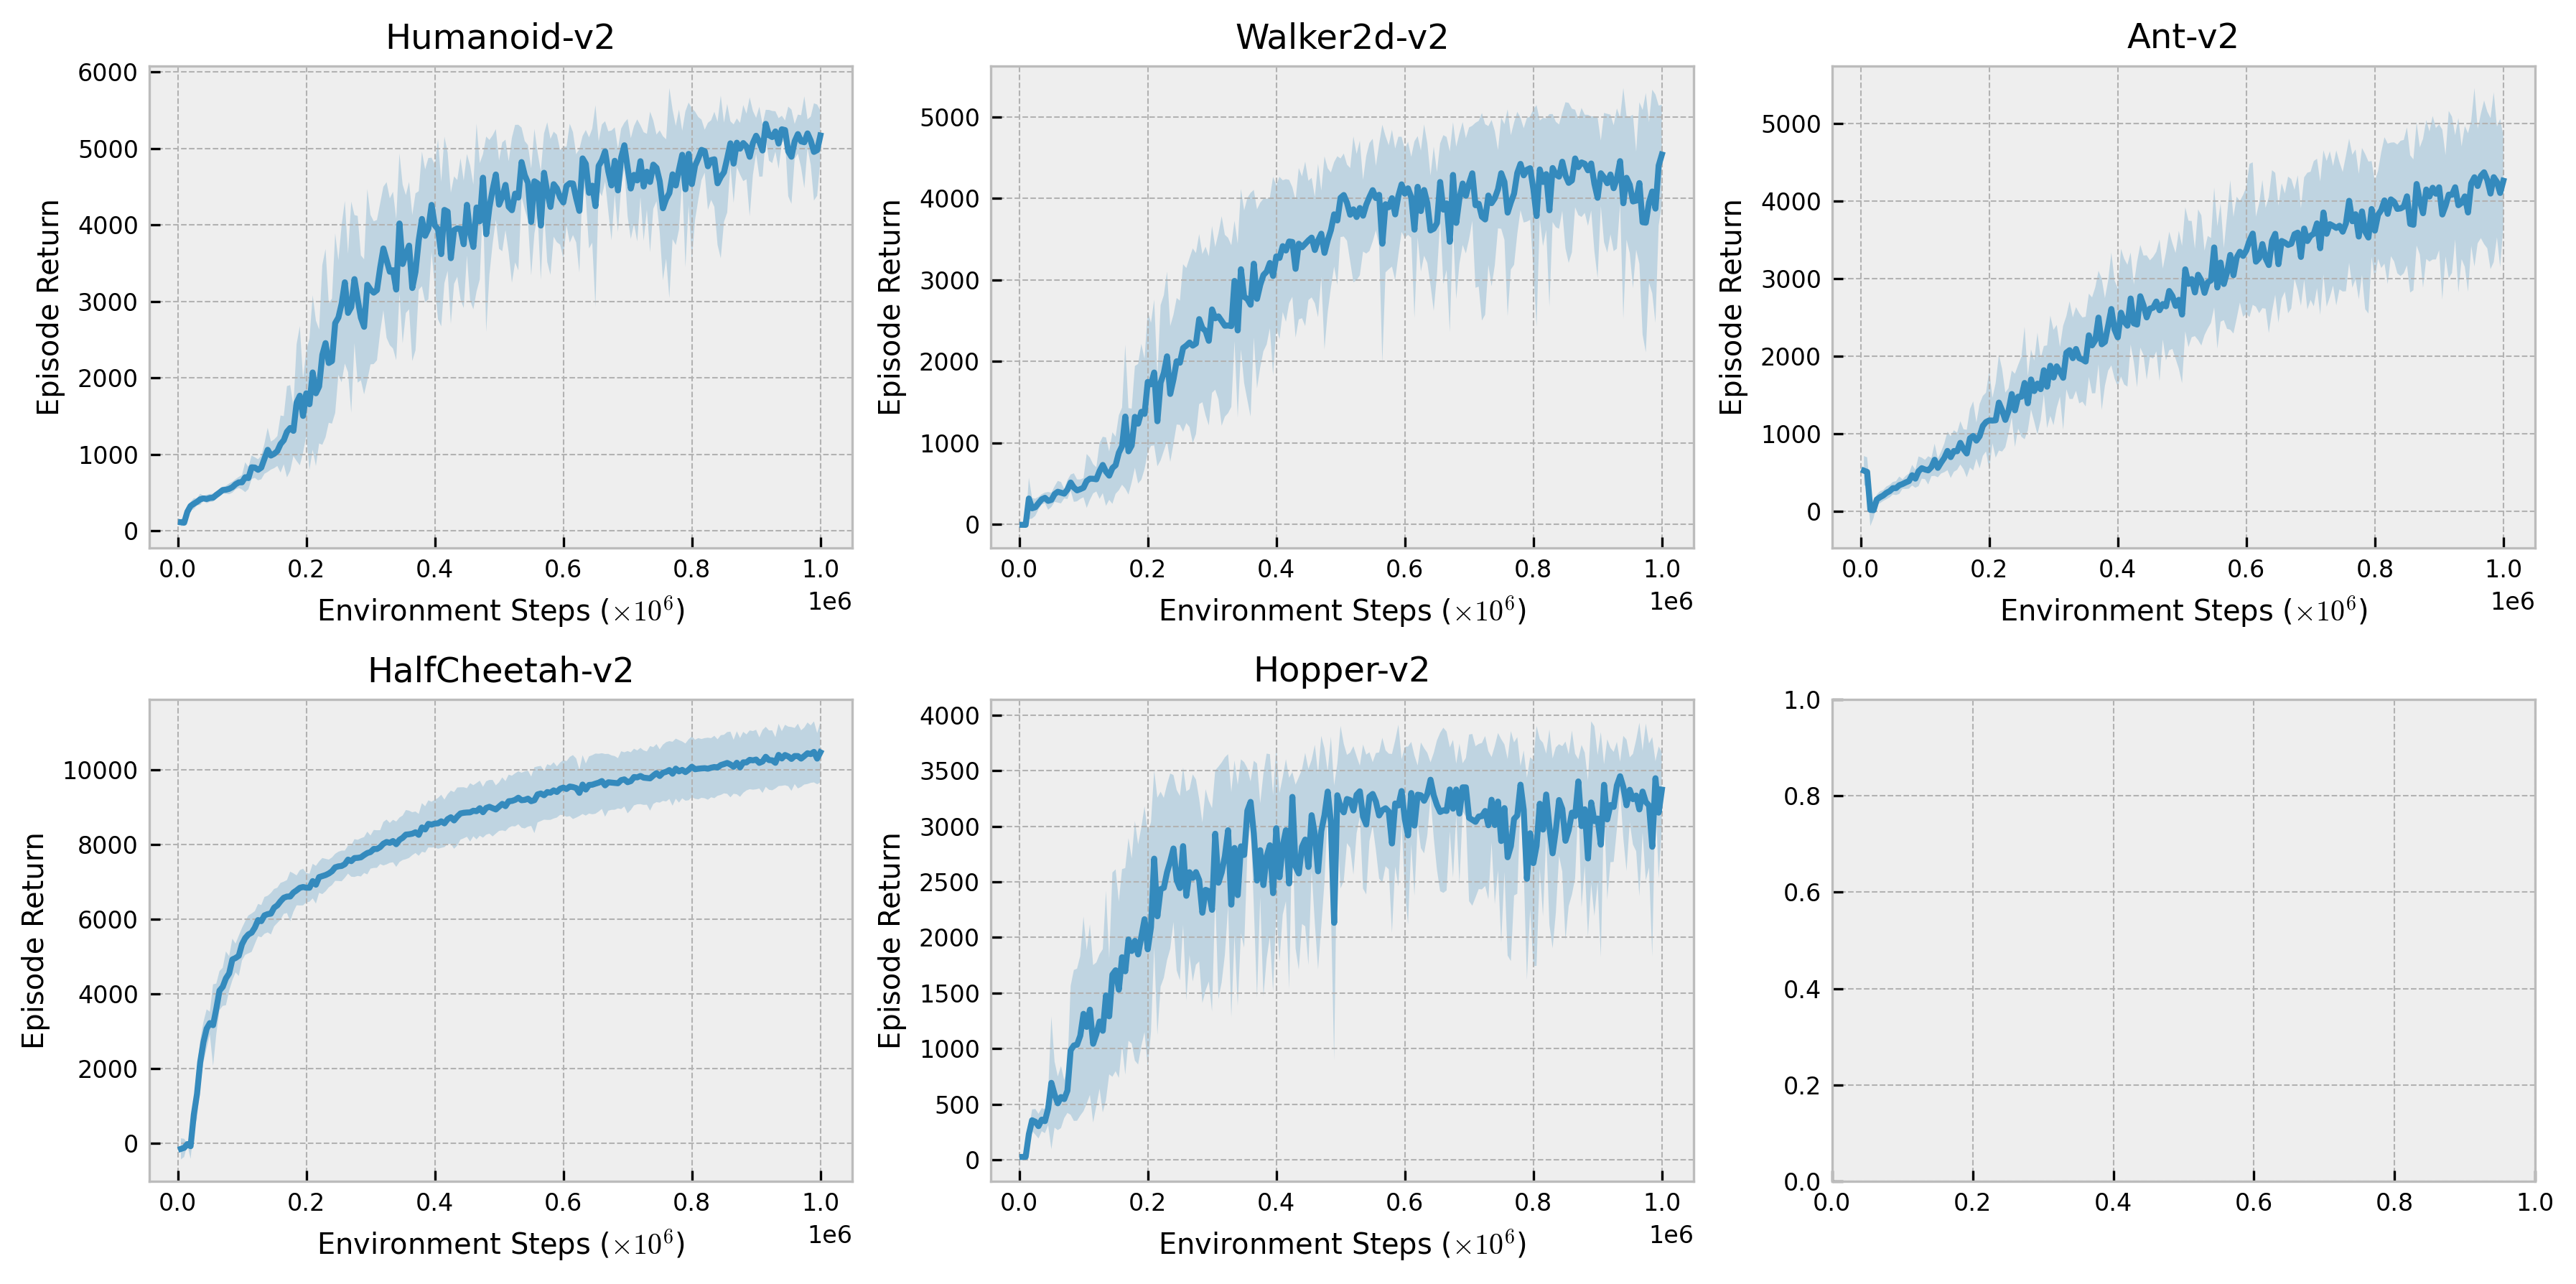

In [8]:
envs = ['Hopper-v2', 'Walker2d-v2', 'HalfCheetah-v2', 'Ant-v2', 'Humanoid-v2'] 
nenvs = 5
nrow = 2
ncol = (nenvs + nrow - 1) // nrow

fig, axs = plt.subplots(nrow, ncol, figsize=(4 * ncol, 3 * nrow))

log_dir = './results'
idx = -1
for env_name in os.listdir(log_dir):
    env_dir = os.path.join(log_dir, env_name)
    if os.path.isdir(env_dir):
        idx += 1
        all_results = []

        min_len = 1e6
        for seed in os.listdir(env_dir):
            result_dir = os.path.join(env_dir, seed)
            results = np.loadtxt(os.path.join(result_dir, 'results.txt'))
            all_results.append(results)
            min_len = min(min_len, results.shape[0])

        all_results = [result[:min_len] for result in all_results]
        all_results = np.stack(all_results, axis=0)

        xs = all_results[0, :, 0]
        mean = np.mean(all_results[:, :, 1], axis=0)
        std = np.std(all_results[:, :, 1], axis=0)
        row = idx // ncol
        col = idx % ncol
        ax = axs[row, col]
        ax.plot(xs, mean)
        ax.fill_between(xs, mean - std, mean + std, alpha=0.25)
        ax.set_xlabel('Environment Steps ($\\times 10^6%$)')
        ax.set_ylabel('Episode Return')
        ax.set_title(env_name)
plt.tight_layout()
plt.show()
fig.savefig('../images/results.png')